In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
df = pd.read_csv('global_cars_enhanced.csv')

In [2]:
df.head()

,Car_ID,Brand,Manufacture_Year,Body_Type,Fuel_Type,Transmission,Engine_CC,Horsepower,Mileage_km_per_l,Price_USD,Manufacturing_Country,Car_Age,Price_Category,HP_per_CC,Age_Category,Efficiency_Score
0,CAR_0001,Mercedes,2006,SUV,Petrol,Manual,4089,547,17,73407,USA,20,Premium,0.1338,Old,0.35
1,CAR_0002,Nissan,2023,Coupe,Petrol,Automatic,4618,167,25,79370,USA,3,Premium,0.0362,New,0.75
2,CAR_0003,Nissan,2007,Hatchback,Diesel,Manual,1802,110,16,76549,China,19,Premium,0.0610,Old,0.30
3,CAR_0004,Nissan,2013,Coupe,Petrol,Manual,1835,373,16,48722,USA,13,Mid-Range,0.2033,Old,0.30
4,CAR_0005,Hyundai,2009,Hatchback,Hybrid,Automatic,2332,145,28,83265,UK,17,Premium,0.0622,Old,0.90


In [3]:
df.describe()

,Manufacture_Year,Engine_CC,Horsepower,Mileage_km_per_l,Price_USD,Car_Age,HP_per_CC,Efficiency_Score
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2015.123333,3052.880000,328.346667,19.716667,60848.823333,10.876667,0.129559,0.485833
std,5.966023,1117.937497,153.202644,6.028061,34445.525598,5.966023,0.093239,0.301403
min,2005.000000,1001.000000,70.000000,10.000000,5221.000000,1.000000,0.017800,0.000000
25%,2010.000000,2074.000000,188.250000,15.000000,29418.500000,6.000000,0.063250,0.250000
50%,2015.000000,3117.500000,329.500000,19.500000,59179.500000,11.000000,0.106850,0.475000
75%,2020.000000,3964.000000,454.750000,24.000000,89692.250000,16.000000,0.168325,0.700000
max,2025.000000,4994.000000,599.000000,30.000000,119587.000000,21.000000,0.525500,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_ID                 300 non-null    object 
 1   Brand                  300 non-null    object 
 2   Manufacture_Year       300 non-null    int64  
 3   Body_Type              300 non-null    object 
 4   Fuel_Type              300 non-null    object 
 5   Transmission           300 non-null    object 
 6   Engine_CC              300 non-null    int64  
 7   Horsepower             300 non-null    int64  
 8   Mileage_km_per_l       300 non-null    int64  
 9   Price_USD              300 non-null    int64  
 10  Manufacturing_Country  300 non-null    object 
 11  Car_Age                300 non-null    int64  
 12  Price_Category         300 non-null    object 
 13  HP_per_CC              300 non-null    float64
 14  Age_Category           300 non-null    object 
 15  Effici

In [7]:
print("\nTarget Distribution:\n", df["Price_Category"].value_counts())


Target Distribution:
 Price_Category
Budget       78
Mid-Range    75
Premium      74
Luxury       73
Name: count, dtype: int64


In [8]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Car_ID                   0
Brand                    0
Manufacture_Year         0
Body_Type                0
Fuel_Type                0
Transmission             0
Engine_CC                0
Horsepower               0
Mileage_km_per_l         0
Price_USD                0
Manufacturing_Country    0
Car_Age                  0
Price_Category           0
HP_per_CC                0
Age_Category             0
Efficiency_Score         0
dtype: int64


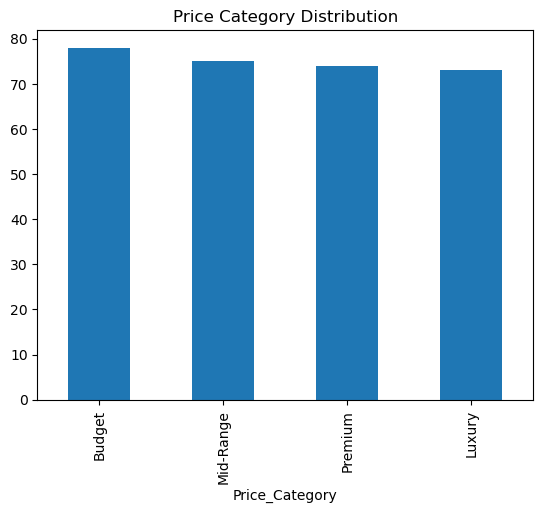

In [9]:
df["Price_Category"].value_counts().plot(kind="bar")
plt.title("Price Category Distribution")
plt.show()

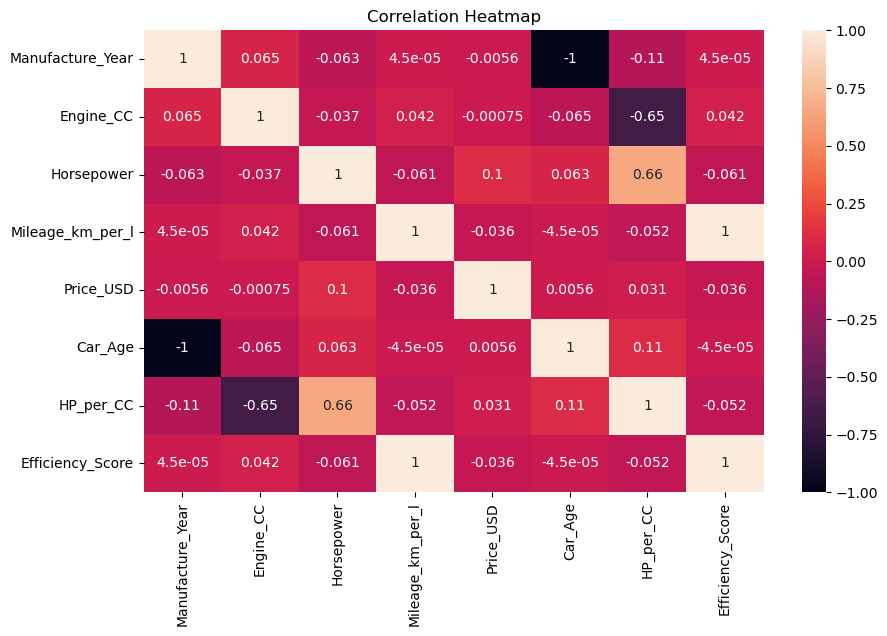

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=["int64","float64"]).corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
df.drop("Car_ID", axis=1, inplace=True)

In [12]:
label_encoders = {}
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [13]:
X = df.drop("Price_Category", axis=1)
y = df["Price_Category"]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
model = RandomForestClassifier(n_estimators=150,random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [18]:
y_pred = model.predict(X_test)
print("\nAccuracy:",accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Confusion Matrix:
 [[16  0  0  0]
 [ 0 14  0  0]
 [ 0  0 10  0]
 [ 0  0  0 20]]


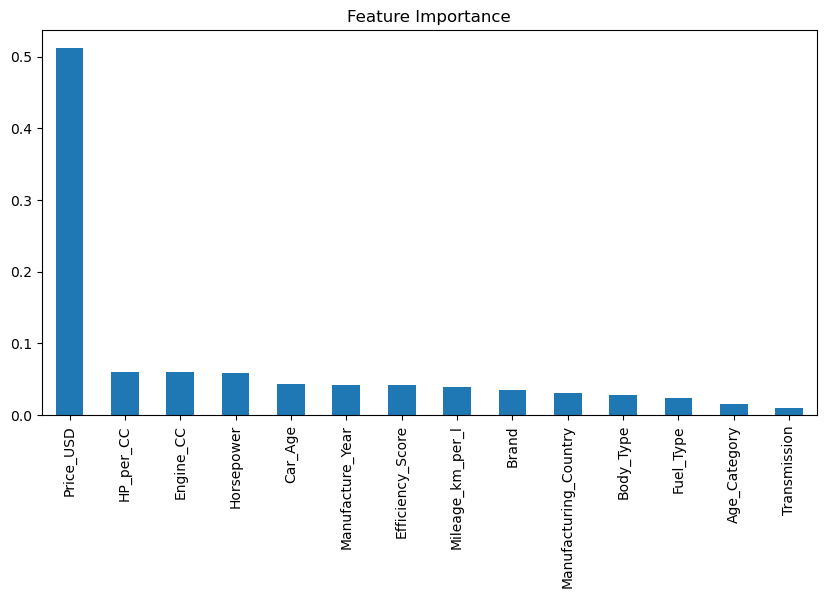

In [19]:
importances = pd.Series(model.feature_importances_,index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.title("Feature Importance")
plt.show()